In [1]:
import os
print(os.getcwd() + "\n")


/Users/joselopez/Desktop/Hands-On-Data-Analysis-with-Pandas-2nd-edition-master/ch_05



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

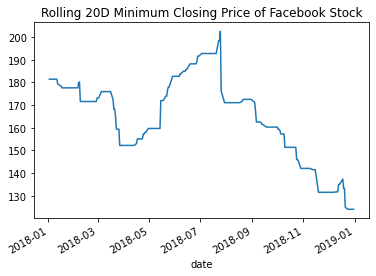

In [4]:
fb.close.rolling('20D').min().plot(
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

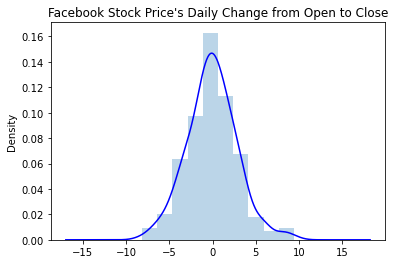

In [5]:
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)
differential.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

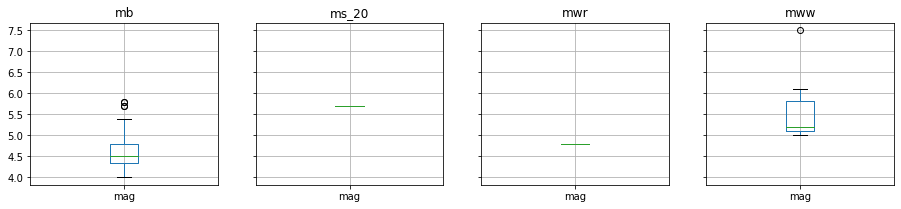

In [6]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']]\
    .groupby('magType').boxplot(layout=(1, 4), figsize=(15, 3))

<AxesSubplot:title={'center':'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

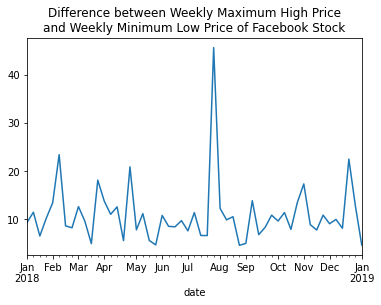

In [7]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock'
)

<AxesSubplot:xlabel='date'>

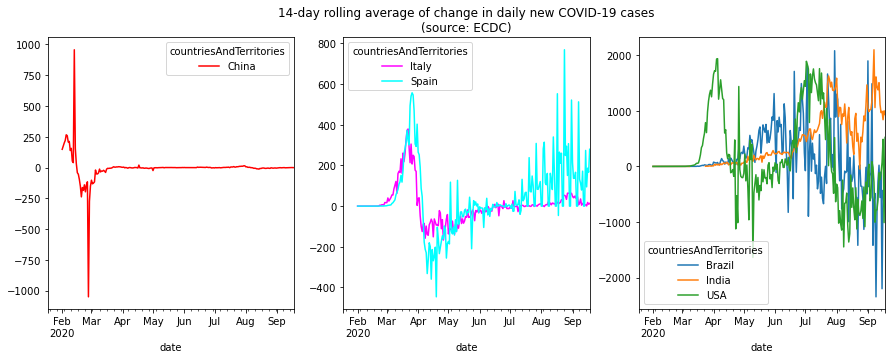

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], color=['magenta', 'cyan'],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])


<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

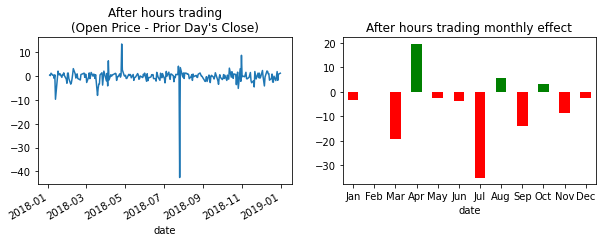

In [9]:
series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)
